# Naïve Bayes: Iris

Vamos a crear un modelo de clasificación con Naïve Bayes para el dataset de Iris.

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import naive_bayes, neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Preparación de los datos

Cargamos los datos y creamos una sola estructura con todos los datos para poder visualizarlos más fácilmente

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## EDA

1. obtenga las estadisticas descriptivas de iris (describe). (Necesitariamos escalar si tuviesemos un algortimo como KNN?)

In [4]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


R// debido que los valores no tienen mucha diferencia, no seria necesario escala para un algoritmo KNN


2. Hay datos duplicados?

In [5]:
size = iris.groupby(iris.columns.tolist(),as_index=False).size()
size[size['size']>1]

,sepal.length,sepal.width,petal.length,petal.width,variety,size
76,5.8,2.7,5.1,1.9,Virginica,2


3. Cree un grafico de barras donde se muestre el conteo de cada especie

In [6]:
df_especies=iris.groupby("variety",as_index=False).size()
df_especies


,variety,size
0,Setosa,50
1,Versicolor,50
2,Virginica,50


<AxesSubplot:xlabel='variety', ylabel='size'>

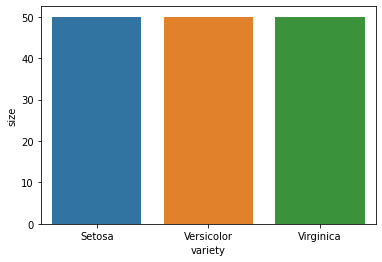

In [7]:
sns.barplot(x="variety", y="size" ,data=df_especies)

4. Genere dos scatter plot cuyas x y 'y'son sepal.width, sepal.length y petal.width, petal.length con la dimension target (es decir hue='target). Que diferencias encuentra entre los distintos tipos de especie? 

<AxesSubplot:xlabel='sepal.width', ylabel='sepal.length'>

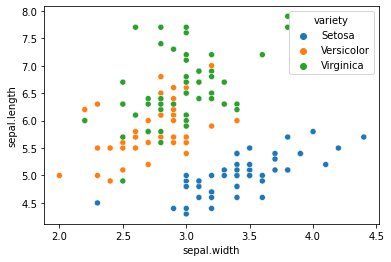

In [8]:
sns.scatterplot(data=iris, x="sepal.width", y="sepal.length", hue="variety")


<AxesSubplot:xlabel='petal.width', ylabel='petal.length'>

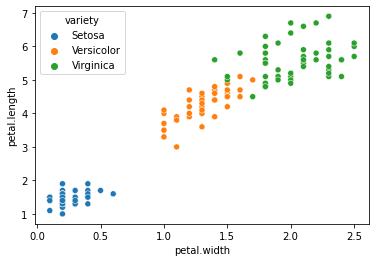

In [9]:
sns.scatterplot(data=iris, x="petal.width", y="petal.length", hue="variety")

5. Cree un heatmap de correlación para todas las variables. Cual es la mas y menos correlacionada?

<AxesSubplot:>

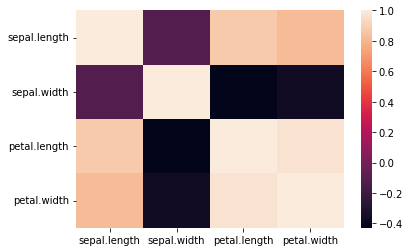

In [10]:
sns.heatmap(iris.corr())

R//  la que tiene mas correlaciones petal.length con petal.width y la menos correlacionada son el petal.lenght con el sepal.width 

6. Cree un diagrama de cajas y bigotes donde las x sean las especies y la y sean todas las variables. Nuestro propósito es analizar las distribuciones, que puede decir sobre ellas en cada variables con respecto a las distintas especies?

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

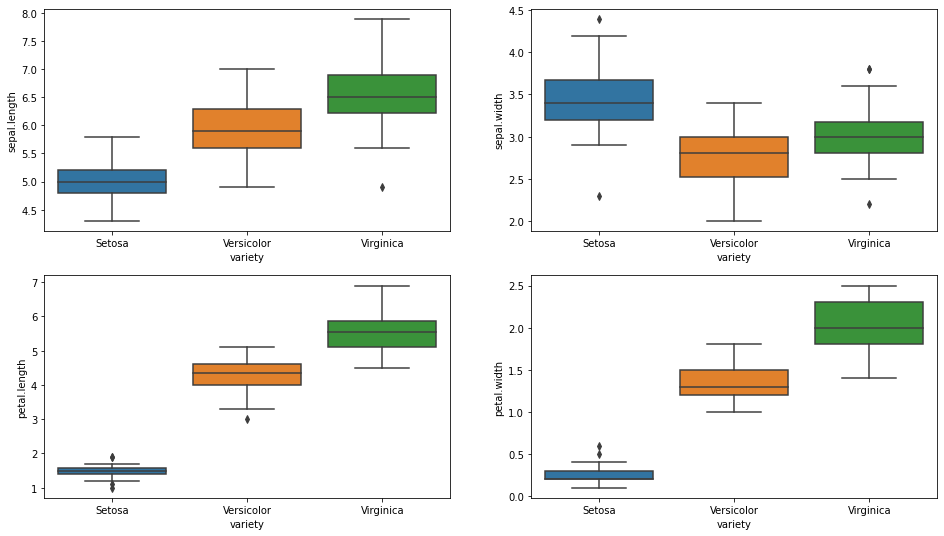

In [11]:
#pista para hacer varios boxplot en cuadrilla
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x='variety',y='sepal.length',data=iris, orient="v", ax=axes[0,0])
sns.boxplot(x='variety',y='sepal.width',data=iris, orient="v", ax=axes[0,1])
sns.boxplot(x='variety',y='petal.length',data=iris, orient="v", ax=axes[1,0])
sns.boxplot(x='variety',y='petal.width',data=iris, orient="v", ax=axes[1,1])

R// 

7. Cree un kdplot y grafique las variables discriminando por especie (hue). Son diferentes las distribuciones?

<AxesSubplot:xlabel='petal.width', ylabel='Density'>

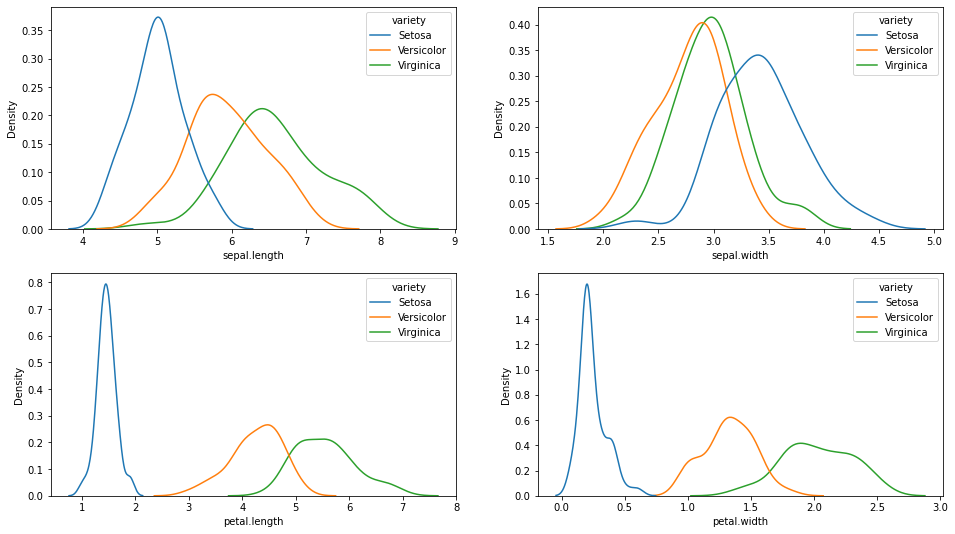

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.kdeplot(hue='variety',x='sepal.length',data=iris, ax=axes[0,0])
sns.kdeplot(hue='variety',x='sepal.width',data=iris,  ax=axes[0,1])
sns.kdeplot(hue='variety',x='petal.length',data=iris, ax=axes[1,0])
sns.kdeplot(hue='variety',x='petal.width',data=iris,  ax=axes[1,1])

## Clasificación a partir de Naïve Bayes

Vamos a utilizar un clasificador [Naïve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) que supone una distribución Gaussiana de los datos numéricos, ya que los valores de las variables independientes son continuos.

8. Entrene un modelo de Naive Bayes, recuerde realizar el particionamiento con metodo train_test_split. Luego imprima el reporte de clasificación (classification report) visto en talleres anteriores.

In [13]:
# pista
#gnb = naive_bayes.GaussianNB()
#modeloGNB = gnb.fit(X, y)

X = iris.iloc[:,:-1]
y= iris.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
gnb = naive_bayes.GaussianNB()
modeloGNB = gnb.fit(X, y)


In [14]:
pred = modeloGNB.predict(X_test)
modeloGNB.score(X_test,y_test)

1.0

In [15]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      1.00      1.00        18
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


9. Entrene un modelo de Logistic Regression, recuerde realizar el particionamiento con metodo train_test_split. Luego imprima el reporte de clasificación (classification report) visto en talleres anteriores.

In [16]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
modelLog =  logistic.fit(X_train, y_train)
pred2 = modelLog.predict(X_test)
modelLog.score(X_test,y_test)

0.9777777777777777

In [17]:
print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


10. Entrene un modelo de KNN, recuerde realizar el particionamiento con metodo train_test_split. Es necesario estandarizar los datos? Luego imprima el reporte de clasificación (classification report) visto en talleres anteriores. Trate de buscar el mejor k...

In [18]:
k = 5

KNN = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric='minkowski')
modelKNN = KNN.fit(X_train, y_train)

pred3 = modelKNN.predict(X_test)
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))
print(modelKNN.score(X_test,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
0.9777777777777777


11. Realice un barplot cuyos ejes x sean los modelos y y el accuracy de estods mismos

In [19]:
model_score ={
    'Naive Bayes':modeloGNB.score(X_test,y_test) ,
    'Logistic Regression': modelLog.score(X_test,y_test),
    'KNN': modelKNN.score(X_test,y_test)
}

df = pd.DataFrame()
df['modelo'] = ['Naive Bayes', 'Logistic Regression','KNN']
df['accuracy'] = [modeloGNB.score(X_test,y_test),modelLog.score(X_test,y_test), modelKNN.score(X_test,y_test)]



<AxesSubplot:xlabel='modelo', ylabel='accuracy'>

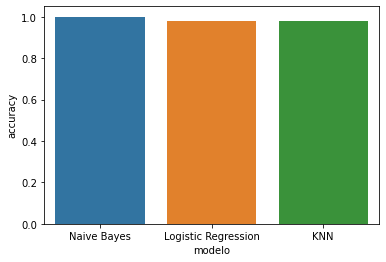

In [20]:
sns.barplot(x="modelo", y="accuracy" ,data=df)

12. Cuál cree que es el mejor modelo? Por qué?

R/ 

13. Dado el caso que hayan modelos empatados, podemos utilizar CV para realizar un desempate (y que nuestro dataset es pequeño). Para los modelos que estuvieron muy cerca utilice CV con la metrica accuracy y saque el promedio para comaparar

In [54]:
#Pista
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#from sklearn.model_selection import cross_val_score
#print(cross_val_score(modelo, X, y, cv=10))
# modelo es nuestro modelo entrenado
# X y y son el dataset completo (sin hacer split), ya que cross_val_score lo hace por nosotros


from sklearn.model_selection import cross_validate
modelo_datos1 =  cross_validate(modeloGNB, X, y, cv=5, scoring=['accuracy','f1_macro','recall_micro'])
print(modelo_datos1)
print('\n')
modelo_datos2 =  cross_validate(modelLog, X, y, cv=5,scoring=['accuracy','f1_macro','recall_macro'])
print(modelo_datos2)
print('\n')
modelo_datos3 = cross_validate(modelKNN, X, y, cv=5,scoring=['accuracy','f1_macro','recall_macro'])
print(modelo_datos3)


promedio_accuracy = modelo_datos1.get('test_accuracy')
promedio_f1 = modelo_datos1.get('test_f1_macro')
promedio_recall = modelo_datos1.get('test_recall_macro')
print('\n')

print('Modelo GNB: \n')
print('media accuracy: '+  str(promedio_accuracy.mean()) +' desviacion accuracy: '+str(promedio_accuracy.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))

promedio_accuracy = modelo_datos2.get('test_accuracy')
promedio_f1 = modelo_datos2.get('test_f1_macro')
promedio_recall = modelo_datos2.get('test_recall_macro')

print('Modelo Logistic: \n')
print('media accuracy: '+  str(promedio_accuracy.mean()) +' desviacion accuracy: '+str(promedio_accuracy.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))

promedio_accuracy = modelo_datos3.get('test_accuracy')
promedio_f1 = modelo_datos3.get('test_f1_macro')
promedio_recall = modelo_datos3.get('test_recall_macro')

print('Modelo KNN: \n')
print('media accuracy: '+  str(promedio_accuracy.mean()) +' desviacion accuracy: '+str(promedio_accuracy.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))
print('media f1: '+  str(promedio_f1.mean()) +' desviacion f1: '+str(promedio_f1.std()))

{'fit_time': array([0.0030005 , 0.00300288, 0.00399947, 0.00200105, 0.00299668]), 'score_time': array([0.00499725, 0.00500035, 0.00400019, 0.00400257, 0.00399971]), 'test_accuracy': array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 'test_f1_macro': array([0.93333333, 0.96658312, 0.93265993, 0.93265993, 1.        ]), 'test_recall_micro': array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])}


{'fit_time': array([0.02700329, 0.0349977 , 0.02999878, 0.02900195, 0.03700352]), 'score_time': array([0.0030005 , 0.00299978, 0.00499892, 0.00299644, 0.00400043]), 'test_accuracy': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]), 'test_f1_macro': array([0.96658312, 1.        , 0.93265993, 0.96658312, 1.        ]), 'test_recall_macro': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}


{'fit_time': array([0.00199962, 0.00199962, 0.002002  , 0.00199962, 0.00399494]), 'score_time': array([0.00499773, 0.00700092, 0.00499511, 0.0

In [30]:
print(cross_val_score(modeloGNB, X, y, cv=5,  scoring='f1_micro'))
print('\n')
print(cross_val_score(modelLog, X, y, cv=5))
print('\n')
print(cross_val_score(modelKNN, X, y, cv=5))

[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


[0.96666667 1.         0.93333333 0.96666667 1.        ]


[0.96666667 1.         0.93333333 0.96666667 1.        ]
